In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
report_df = pd.read_csv('HR_comma_sep.csv')
report_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
report_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
satisfaction_level       14999 non-null float64
last_evaluation          14999 non-null float64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null int64
left                     14999 non-null int64
promotion_last_5years    14999 non-null int64
sales                    14999 non-null object
salary                   14999 non-null object
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


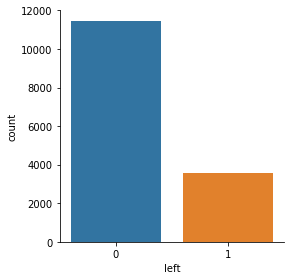

In [8]:
sns.factorplot("left",data=report_df,kind='count',legend=True)

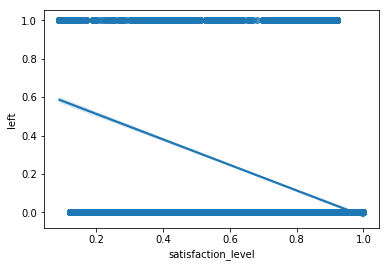

In [77]:
sns.regplot(x="satisfaction_level", y="left", data=report_df, order=1, truncate=True)

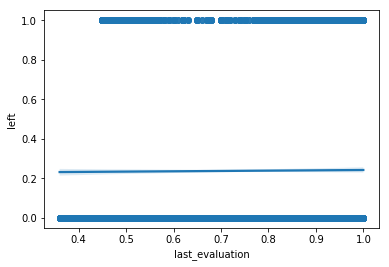

In [88]:
sns.regplot(x="last_evaluation", y="left", data=report_df, truncate=True)

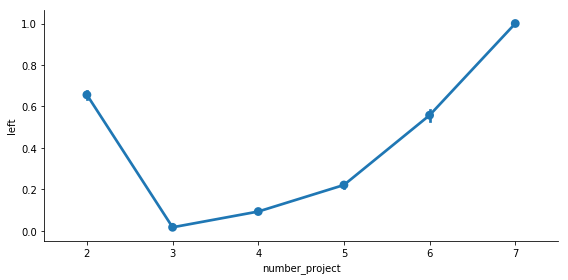

In [85]:
sns.factorplot('number_project','left',data=report_df,aspect=2)

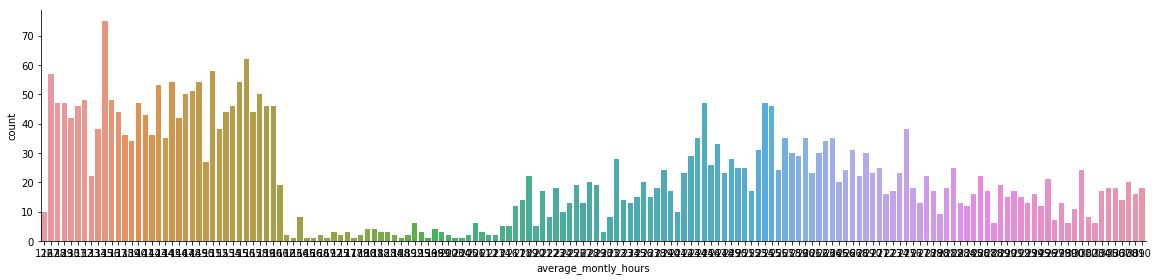

In [109]:
sns.factorplot("average_montly_hours", data=report_df[report_df.left == 1],kind='count',aspect=4,orient='h')

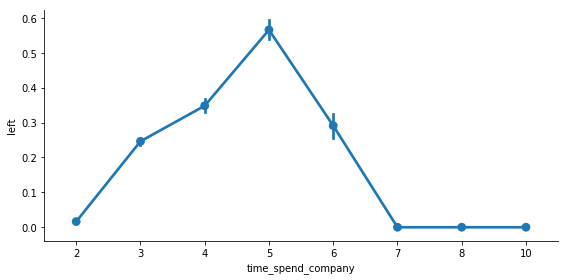

In [95]:
sns.factorplot('time_spend_company','left',data=report_df,aspect=2)

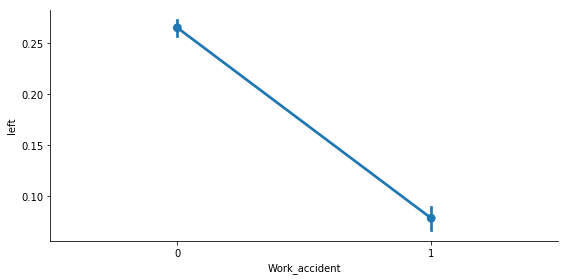

In [99]:
sns.factorplot('Work_accident','left',data=report_df,aspect=2)

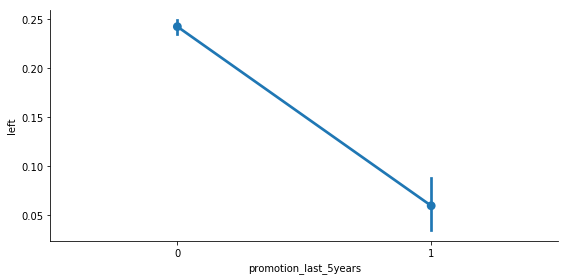

In [100]:
sns.factorplot('promotion_last_5years','left',data=report_df,aspect=2)

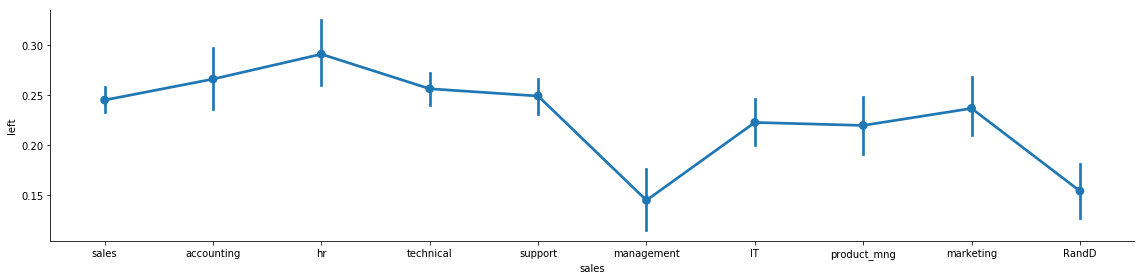

In [102]:
sns.factorplot('sales','left',data=report_df,aspect=4)

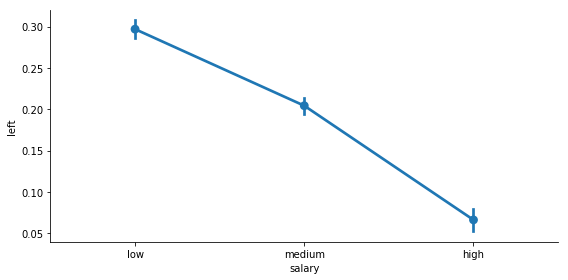

In [81]:
sns.factorplot('salary','left',data=report_df,aspect=2)

In [37]:
report_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [113]:
domain_df = pd.get_dummies(report_df.sales, prefix='domain')
domain_df.head()

,domain_IT,domain_RandD,domain_accounting,domain_hr,domain_management,domain_marketing,domain_product_mng,domain_sales,domain_support,domain_technical
0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,1,0,0


In [114]:
salary_df = pd.get_dummies(report_df.salary, prefix='salary')
salary_df.head()

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0


In [219]:
processed_df = pd.concat([report_df, domain_df, salary_df], axis=1)
processed_df.drop(['sales','salary'],axis=1,inplace=True)
processed_df.drop(['last_evaluation','time_spend_company','average_montly_hours'],axis=1,inplace=True)
processed_df.head()

,satisfaction_level,number_project,Work_accident,left,promotion_last_5years,domain_IT,domain_RandD,domain_accounting,domain_hr,domain_management,domain_marketing,domain_product_mng,domain_sales,domain_support,domain_technical,salary_high,salary_low,salary_medium
0,0.38,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,0.80,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
2,0.11,7,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1
3,0.72,5,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,0.37,2,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0


In [220]:
result_df = processed_df['left']
processed_df.drop(['left'],axis=1,inplace=True)
from sklearn.model_selection import train_test_split
train_valid_X,test_X,train_valid_y,test_y = train_test_split(processed_df,result_df, test_size=0.3)
train_X , valid_X , train_y , valid_y = train_test_split( train_valid_X , train_valid_y , train_size = .7 )

In [221]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(train_X,train_y)
print('Train accuracy: ' + str(model.score(train_X,train_y))+'\nValidation accuracy: '+ str(model.score(valid_X,valid_y)))

Train accuracy: 0.823513403184
Validation accuracy: 0.825714285714


In [225]:
from sklearn.metrics import accuracy_score
test_Y = model.predict(test_X)
print("Test accuracy: ", str(accuracy_score(test_y,test_Y)))

Test accuracy:  0.804222222222
